# Â¶Ç‰Ωï‰ΩøÁî® Intel OpenVINO Âèä Ultralytics YOLOv11 ÂÆåÊàêÂßøÊÖã‰º∞Ê∏¨
by Jack OmniXRI, 2024/10/15

Êú¨Á®ãÂºè‰∏ªË¶ÅÂåÖÂê´‰∏ãÂàóÂπæÂ§ßÊ≠•È©ü„ÄÇ  
1. ÂéüÂßã YOLOv11 Êé®Ë´ñÁµêÊûú  
2. ËΩâÊèõÂà∞ OpenVINO IRÊé®Ë´ñÁµêÊûú  
3. Á∂ìÈÅé NNCF Â£ìÁ∏ÆÂÑ™ÂåñÊé®Ë´ñÁµêÊûú
4. ‰ΩøÁî®Âü∫Ê∫ñÊ∏¨Ë©¶Â∑•ÂÖ∑ÈÄ≤Ë°åÊØîËºÉ  
5. ÈÄ£Á∫åÂΩ±ÁâáÊé®Ë´ñÂ±ïÁ§∫

Â¶ÇÊûúÊÉ≥Ë¶ÅÂú®Êú¨Ê©üÁ´Ø‰∏äÈÅãË°åÊú¨ÁØÑ‰æãÔºåÂèØÂèÉËÄÉGithubÊèê‰æõÁöÑ„Äå[ÂÆâË£ùÊ≠•È©ü](https://github.com/openvinotoolkit/openvino_notebooks/blob/latest/README.md#-installation-guide)„Äç‰æÜÂÆåÊàê„ÄÇ

ÂéüÂßãÁ®ãÂºèÂèäÈÄ≤ÈöéË™™ÊòéÔºö  
https://colab.research.google.com/github/openvinotoolkit/openvino_notebooks/blob/latest/notebooks/yolov11-optimization/yolov11-keypoint-detection.ipynb


## 1. ÂéüÂßã YOLOv11 Êé®Ë´ñÁµêÊûú



### 1.1 ÂÆâË£ù Intel OpenVINO „ÄÅ Ultralytics(YOLOv11) ÂèäÂøÖË¶ÅÂ•ó‰ª∂ÂåÖ
‰∏ãËºâÂèäÂÆâË£ù OpenVINO, NNCF, PyTorch, Ultralytic(YOLOv11), OpenCV Á≠âÁõ∏ÈóúÂ•ó‰ª∂ÂåÖ„ÄÇ  
Ë®ªÔºöÁî±Êñº OpenVINO Âú® Colab Áí∞Â¢É‰∏ãÂè™ËÉΩÂú® Intel Xeon CPU ‰∏ãÈÅãË°åÔºåÊâÄ‰ª•ÈÄôË£°ÂÆâË£ùÁöÑ PyTorch ÊòØ CPU ÁâàÊú¨„ÄÇ

In [ ]:
# Â∑≤ÁßªÈô§ Colab ÁöÑ pip installÔºåË´ãÊîπÁî® requirements.txt ÂÆâË£ùÂ•ó‰ª∂
# pip install -r requirements.txt

### 1.2 ‰∏ãËºâÂøÖË¶ÅÂáΩÂºèÂ∫´‰∏¶ÂºïÂÖ•
‰∏ãËºâ notebook_utils.py Âà∞Êö´Â≠òÂçÄÔºå‰∏¶ÂºïÂÖ• download_file, VideoPlayer, device_widge ÂáΩÂºèÂ∫´„ÄÇ

In [4]:
from pathlib import Path

# Fetch `notebook_utils` module
import requests

r = requests.get(
    url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py",
)

open("notebook_utils.py", "w").write(r.text)
from notebook_utils import download_file, VideoPlayer, device_widget

### 1.3 ‰∏ãËºâÊ∏¨Ë©¶Áî®ÂΩ±ÂÉè
‰∏ãËºâÁ∂≤Ë∑Ø‰∏äÂΩ±ÂÉèÊ™î intel_rnb.jpgÔºåÂèØËá™Ë°åÊõøÊèõ url ÂæåÂΩ±ÂÉè‰æÜÊ∫êË∑ØÂæë„ÄÇ

In [5]:
# Download a test sample

IMAGE_PATH = Path("data/intel_rnb.jpg")
download_file(
    url="https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/image/intel_rnb.jpg",
    filename=IMAGE_PATH.name,
    directory=IMAGE_PATH.parent,
)

PosixPath('/home/willie/YOLO-model-test/data/intel_rnb.jpg')

### 1.4 ÊåáÂÆöÊé®Ë´ñÁî®Ê®°ÂûãÂêçÁ®±‰∏¶‰∏ãËºâ
Âª∫Á´ãÊ®°ÂûãÂêçÁ®±Ê∏ÖÂñÆÔºåÂèØ‰ΩøÁî®‰∏ãÊãâÁõíÂºèÈÅ∏ÂèñÔºåÈ†êË®≠ÂêçÁ®±ÁÇ∫ÁÇ∫Á¨¨[0]ÂÄãÔºåyolo11n-pose„ÄÇ  
ÈÄôË£°ÂèØÊîØÊè¥ yolov8 Âèä yolov11 Ê®°ÂûãÂêçÁ®±Ôºån, s, m, l, x ÂàÜÂà•‰ª£Ë°®Ê®°ÂûãÁöÑÂ§ßÂ∞èÔºåÂæûÊúÄÂ∞èÂà∞ÊúÄÂ§ßÔºåË∂äÂ∞èÊé®Ë´ñÈÄüÂ∫¶Ë∂äÂø´‰ΩÜÁ≤æÂ∫¶Áï•Â∑ÆÔºåÂèç‰πãË∂äÂ§ßÂâáË∂äÊÖ¢‰ΩÜÁ≤æÂ∫¶ÊúÉÊèêÈ´ò‰∏Ä‰∫õÔºåÂèØ‰æùÂØ¶ÈöõÈúÄÊ±ÇË™øÊï¥„ÄÇ  

In [6]:
import ipywidgets as widgets

model_id = [
    "yolo11n-pose",
    "yolo11s-pose",
    "yolo11m-pose",
    "yolo11l-pose",
    "yolo11x-pose",
    "yolov8n-pose",
    "yolov8s-pose",
    "yolov8m-pose",
    "yolov8l-pose",
    "yolov8x-pose",
]

model_name = widgets.Dropdown(options=model_id, value=model_id[5], description="Model") #set yolov8n-pose as default model
model_name

Dropdown(description='Model', index=5, options=('yolo11n-pose', 'yolo11s-pose', 'yolo11m-pose', 'yolo11l-pose'‚Ä¶

### 1.5 ÂØ¶‰æãÂåñ YOLO ‰∏¶Ê∏¨Ë©¶Êé®Ë´ñ

‰æù‰∏ä‰∏ÄÊ≠•È©üÂèñÂæó‰πãÊ®°ÂûãÂêçÁ®±‰∏ãËºâÊ®°Âûã‰∏¶ÂØ¶‰æãÂåñÊàê pose_model  
Êé•ËëóÁõ¥Êé•‰ΩøÁî®Ë©≤Ê®°ÂûãÂ∞çÂÖàÂâçÊåáÂÆöÂ•ΩÁöÑÂΩ±ÂÉèÈÄ≤Ë°åÊé®Ë´ñÔºå‰∏¶ÂèñÂæóÂßøÊÖãÔºàÈóúÁØÄÈªûÔºâÁµêÊûú res ÔºàÂåÖÂê´Áâ©‰ª∂Â§ñÊ°Ü„ÄÅÈ°ûÂà•ÂèäÁΩÆ‰ø°Â∫¶ÔºâÁπ™Ë£ΩÂú®ÂΩ±ÂÉè‰∏ä„ÄÇ  
Âè¶Â§ñÊúÉËº∏Âá∫Á∏ΩÊôÇÈñìÂèäÂêÑÊ≠•È©üÂ∑•‰ΩúÊâÄËÄóË≤ªÊôÇÈñìÔºåÂåÖÂê´ÂâçËôïÁêÜÔºàÂΩ±ÂÉèËΩâÊèõÁ≠âÔºâ„ÄÅÊé®Ë´ñÔºàÂßøÊÖã‰º∞Ê∏¨ÔºâÂèäÂæåËôïÁêÜÔºàËº∏Âá∫Êï∏ÂÄºÂèäÁπ™Ë£ΩÁµêÊûúÔºâ„ÄÇ  

Ë®ªÔºöÁêÜË´ñ‰∏äÂ¶ÇÊûúÂè™ÊòØÊÉ≥ÂèñÂæóÂßøÊÖã‰º∞Ê∏¨ÁµêÊûúÔºåÂà∞ÈÄô‰∏ÄÊ≠•Â∞±ÂèØÁµêÊùü‰∫Ü„ÄÇ‰ΩÜÈÄôË£°ÂèØÂÖàË®ò‰∏ãÂ∑•‰ΩúËÄóÊôÇÂèäÁΩÆ‰ø°Â∫¶ÔºåÊñπ‰æøÂæåÈù¢ÂíåÁ∂ìÈÅé OpenVINO ËôïÁêÜÈÅéÁöÑÂÖßÂÆπ‰ΩúÊØîËºÉ„ÄÇ  




In [ ]:
# Â∑≤ÁßªÈô§ Colab ÁöÑ pip installÔºåË´ãÊîπÁî® requirements.txt ÂÆâË£ùÂ•ó‰ª∂
# pip install -r requirements.txt


image 1/1 /home/willie/YOLO-model-test/data/intel_rnb.jpg: 480x640 1 person, 127.8ms
Speed: 6.5ms preprocess, 127.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


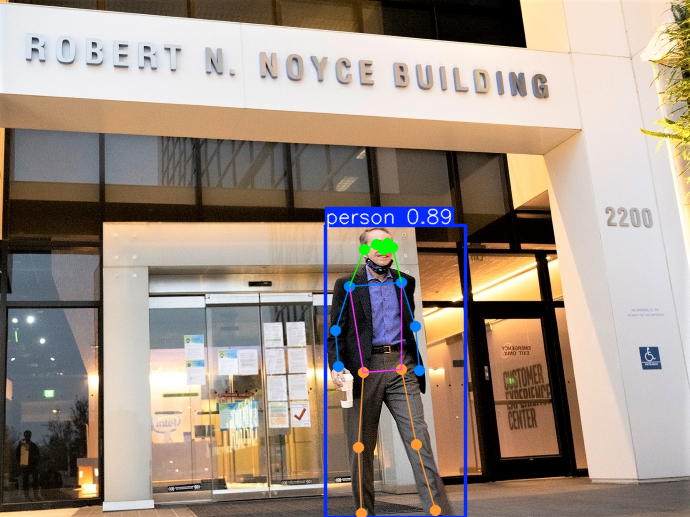

In [7]:
from PIL import Image
from ultralytics import YOLO

POSE_MODEL_NAME = model_name.value

pose_model = YOLO(f"{POSE_MODEL_NAME}.pt")
label_map = pose_model.model.names

res = pose_model(IMAGE_PATH)
Image.fromarray(res[0].plot()[:, :, ::-1])

## 2. ËΩâÊèõÂà∞ OpenVINO IRÊé®Ë´ñÁµêÊûú


### 2.1 Â∞áÊ®°ÂûãËΩâÊèõÊàê OpenVINO IR Ê†ºÂºè
Ultralytics Êú¨‰æÜÂ∞±ÊúâÊîØÊè¥Â∞áÊ®°ÂûãËº∏Âá∫Êàê Intel OpenVINO IR(xml + bin) Ê†ºÂºèÔºåÂè™Ë¶ÅÂü∑Ë°å‰∏ãÂàóÁ®ãÂºèÂç≥ÂèØ„ÄÇ  
ËΩâÊèõÂ•ΩÁöÑÊ®°ÂûãÊúÉÂ≠òÊîæÂú® /yolo11n-pose_openvino_model/ Ë∑ØÂæë‰∏ã„ÄÇÈÄôË£°‰ªç‰øùÊåÅÂéüÊúâ FP32 Ë≥áÊñôÊ†ºÂºè„ÄÇ

Ë®ªÔºöÈÄôË£°Ë¶Å‰øùÁïôÂãïÊÖãÂΩ¢ÁãÄÔºàDynamic ShapeÔºâË®≠ÂÆöÁÇ∫ TrueÔºåÊñπ‰æøÂæåÁ∫åÂ∑•‰Ωú„ÄÇ

In [8]:
# object detection model
pose_model_path = Path(f"{POSE_MODEL_NAME}_openvino_model/{POSE_MODEL_NAME}.xml")
if not pose_model_path.exists():
    pose_model.export(format="openvino", dynamic=True, half=True)

### 2.2 ÈÅ∏ÊìáÊé®Ë´ñË£ùÁΩÆ
Âú® Google Colab ‰∏äÂè™ËÉΩÈÅ∏ CPU ÔºåÂú®Êú¨Ê©üÁ´ØÂâáÈÇÑÂèØÈÅ∏Áî®Intel GPUÔºàÂÖßÈ°ØÔºâ‰æÜÊèêÂçáÊé®Ë´ñÈÄüÂ∫¶„ÄÇ  ‰∏çÈÅé‰∏ÄËà¨ÁÇ∫‰∫ÜÊñπ‰æøÔºåÂèØÁõ¥Êé•Ë®≠ÁÇ∫ AUTO ËÆìÁ≥ªÁµ±Ëá™Ë°åÈÅ∏Áî®Âç≥ÂèØ„ÄÇ  

In [10]:
device = device_widget()

device

Dropdown(description='Device:', index=1, options=('CPU', 'AUTO'), value='AUTO')

### 2.3 Ê∏¨Ë©¶ÂñÆÂºµÂΩ±ÂÉè
ÈÄôË£°ÁöÑÊ∏¨Ë©¶ÂΩ±ÂÉèÊ≤øÁî®Ê≠•È©ü1.3ÔºåÊé•ËëóÊ∏¨Ë©¶ËΩâÊàê Intel OpenVINO IR Ê†ºÂºèÁöÑÊ®°ÂûãÊòØÂê¶ËÉΩÊ≠£Á¢∫Êé®Ë´ñ„ÄÇ  
ÁµêÊûúÊ≠£Á¢∫Ôºå‰∏îÊé®Ë´ñÊôÇÈñìÂèØÊ∏õÂ∞ë‰∏ÄÂçä‰ª•‰∏äÔºåÊé®Ë´ñÁ≤æÂ∫¶‰ªçÊé•ËøëÂéü‰æÜÊ∞¥Ê∫ñ„ÄÇ  


Ultralytics 8.3.167 üöÄ Python-3.10.13 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
Loading yolov8n-pose_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 /home/willie/YOLO-model-test/data/intel_rnb.jpg: 640x640 2 persons, 66.0ms
Speed: 3.9ms preprocess, 66.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


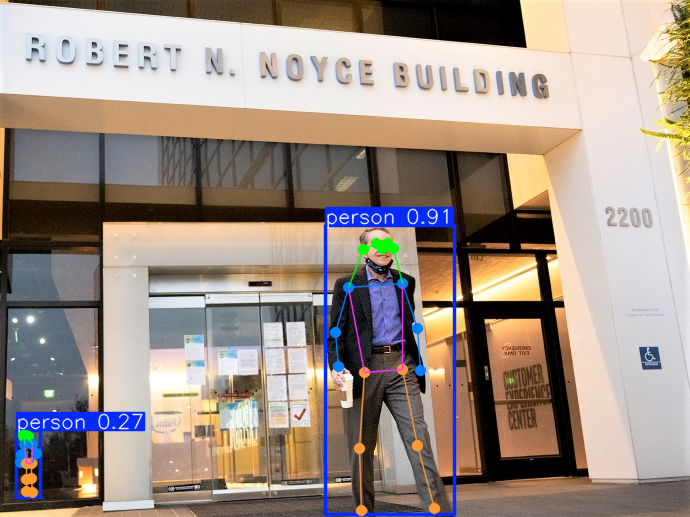

In [17]:
import openvino as ov # ÂºïÂÖ• OpenVINO ÂáΩÂºèÂ∫´

core = ov.Core()
pose_ov_model = core.read_model(pose_model_path)

ov_config = {}
if device.value != "CPU":
    pose_ov_model.reshape({0: [1, 3, 640, 640]})

if "GPU" in device.value or ("AUTO" in device.value and "GPU" in core.available_devices):
    ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}

pose_compiled_model = core.compile_model(pose_ov_model, device.value, ov_config)

pose_model = YOLO(pose_model_path.parent, task="pose")

if pose_model.predictor is None:
    custom = {"conf": 0.25, "batch": 1, "save": False, "mode": "predict"}
    args = {**pose_model.overrides, **custom}
    pose_model.predictor = pose_model._smart_load("predictor")(overrides=args, _callbacks=pose_model.callbacks)
    pose_model.predictor.setup_model(model=pose_model.model)

pose_model.predictor.model.ov_compiled_model = pose_compiled_model

# ÈÄôË£°Â∞±ÊòØÁõ¥Êé•ÊîπÊéâ
res = pose_model(IMAGE_PATH, imgsz=(640,640), rect=False)
Image.fromarray(res[0].plot()[:, :, ::-1])


## 3. Á∂ìÈÅé NNCF Â£ìÁ∏ÆÂÑ™ÂåñÊé®Ë´ñÁµêÊûú
[NNCF](https://github.com/openvinotoolkit/nncf)  ÊòØ OpenVINO ‰ΩúÁÇ∫Ê®°ÂûãÂÑ™ÂåñÁöÑÈáçË¶ÅÂ∑•ÂÖ∑Ôºå ÂÆÉÊèê‰æõ‰∫ÜÂ§öÁ®ÆÊ®°ÂûãÂ£ìÁ∏ÆÂèäÂÑ™ÂåñÊñπÂºèÔºåÈÄôË£°ÂÉÖ‰ΩøÁî®Âà∞ÂèÉÊï∏ÈáèÂåñ(Quantization)ÔºåÂç≥Â∞á FP32 ËΩâÊèõÂà∞ INT8„ÄÇ  


### 3.1 ÊåáÂÆöÊòØÂê¶ÈáèÂåñ
È†êË®≠ to_quantize value ÁÇ∫ TrueÔºåÂç≥Ë¶ÅÂïüÁî®ÈáèÂåñ„ÄÇ  

In [103]:
import ipywidgets as widgets

int8_model_pose_path = Path(f"{POSE_MODEL_NAME}_openvino_int8_model/{POSE_MODEL_NAME}.xml")
quantized_pose_model = None

to_quantize = widgets.Checkbox(
    value=True,
    description="Quantization",
    disabled=False,
)

to_quantize

Checkbox(value=True, description='Quantization')

### 3.2 ‰∏çÂïüÁî®ÈáèÂåñËôïÁêÜÊñπÂºè
Ëã•‰∏çÂïüÁî®ÈáèÂåñÂâáÈúÄ‰ΩøÁî® skip_kernel_extension Ê®°ÁµÑ‰æÜÂçîÂä©Áï•ÈÅéÈÉ®‰ªΩÂ∑•‰Ωú„ÄÇ  

In [14]:
# Fetch skip_kernel_extension module
r = requests.get(
    url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/skip_kernel_extension.py",
)
open("skip_kernel_extension.py", "w").write(r.text)

%load_ext skip_kernel_extension

### 3.3 Áî¢Áîü NNCF ÊâÄÈúÄË≥áÊñôÈõÜ
‰∏ãËºâÊ†°Ê≠£Áî®Ë≥áÊñôÔºå‰∏¶Ë®≠ÂÆöËΩâÊèõÂáΩÂºèÔºåÁî¢Áîü NNCF ÊâÄÈúÄË≥áÊñôÈõÜ„ÄÇ  
Ê≠§Ê≠•È©üÈúÄËºÉÈï∑ÊôÇÈñìÔºåË´ãËÄêÂøÉÁ≠âÂÄô„ÄÇ  

In [15]:
if to_quantize.value:

  import nncf
  from typing import Dict

  from zipfile import ZipFile

  from ultralytics.data.utils import DATASETS_DIR
  from ultralytics.utils import DEFAULT_CFG
  from ultralytics.cfg import get_cfg
  from ultralytics.data.utils import check_det_dataset
  from ultralytics.models.yolo.pose import PoseValidator
  from ultralytics.utils.metrics import OKS_SIGMA

  if not int8_model_pose_path.exists():

      DATA_URL = "https://ultralytics.com/assets/coco8-pose.zip"
      CFG_URL = "https://raw.githubusercontent.com/ultralytics/ultralytics/v8.1.0/ultralytics/cfg/datasets/coco8-pose.yaml"

      OUT_DIR = DATASETS_DIR

      DATA_PATH = OUT_DIR / "val2017.zip"
      CFG_PATH = OUT_DIR / "coco8-pose.yaml"

      download_file(DATA_URL, DATA_PATH.name, DATA_PATH.parent)
      download_file(CFG_URL, CFG_PATH.name, CFG_PATH.parent)

      if not (OUT_DIR / "coco8-pose/labels").exists():
          with ZipFile(DATA_PATH, "r") as zip_ref:
              zip_ref.extractall(OUT_DIR)

      args = get_cfg(cfg=DEFAULT_CFG)
      args.data = "coco8-pose.yaml"

      pose_validator = PoseValidator(args=args)
      pose_validator.data = check_det_dataset(args.data)
      pose_validator.stride = 32
      pose_data_loader = pose_validator.get_dataloader(OUT_DIR / "coco8-pose", 1)

      pose_validator.is_coco = True
      pose_validator.names = label_map
      pose_validator.metrics.names = pose_validator.names
      pose_validator.nc = 1
      pose_validator.sigma = OKS_SIGMA


      def transform_fn(data_item:Dict):
          """
          Quantization transform function. Extracts and preprocess input data from dataloader item for quantization.
          Parameters:
            data_item: Dict with data item produced by DataLoader during iteration
          Returns:
              input_tensor: Input data for quantization
          """
          input_tensor = pose_validator.preprocess(data_item)['img'].numpy()
          return input_tensor


      quantization_dataset = nncf.Dataset(pose_data_loader, transform_fn)

val2017.zip:   0%|          | 0.00/334k [00:00<?, ?B/s]

coco8-pose.yaml:   0%|          | 0.00/552 [00:00<?, ?B/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 2.51MB/s]

val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1894.7¬±1015.8 MB/s, size: 42.4 KB)



val: Scanning /home/willie/YOLO-model-test/datasets/coco8-pose/labels/train... 8 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:00<00:00, 430.31it/s]

val: New cache created: /home/willie/YOLO-model-test/datasets/coco8-pose/labels/train.cache


### 3.4 ‰ΩøÁî® NNCF ÈÄ≤Ë°åÊ®°ÂûãÈáèÂåñ  
ÈñãÂßãÈÄ≤Ë°åÈáèÂåñÔºåÁî¢ÁîüÊñ∞ INT8 Ê®°Âûã„ÄÇ  
Ê≠§Ê≠•È©üÈúÄËºÉÈï∑ÊôÇÈñìÔºåË´ãËÄêÂøÉÁ≠âÂÄô„ÄÇ

In [104]:
if to_quantize.value:

  if not int8_model_pose_path.exists():

      ignored_scope = nncf.IgnoredScope(  # post-processing
          subgraphs=[
              nncf.Subgraph(inputs=[f"__module.model.{22 if 'v8' in POSE_MODEL_NAME else 23}/aten::cat/Concat",
                                    f"__module.model.{22 if 'v8' in POSE_MODEL_NAME else 23}/aten::cat/Concat_1",
                                    f"__module.model.{22 if 'v8' in POSE_MODEL_NAME else 23}/aten::cat/Concat_2",
                                  f"__module.model.{22 if 'v8' in POSE_MODEL_NAME else 23}/aten::cat/Concat_7"],
                            outputs=[f"__module.model.{22 if 'v8' in POSE_MODEL_NAME else 23}/aten::cat/Concat_9"])
          ]
      )

      # Detection model
      quantized_pose_model = nncf.quantize(
          pose_ov_model,
          quantization_dataset,
          preset=nncf.QuantizationPreset.MIXED,
          ignored_scope=ignored_scope
      )
      print(f"Quantized keypoint detection model will be saved to {int8_model_pose_path}")
      ov.save_model(quantized_pose_model, str(int8_model_pose_path))

INFO:nncf:120 ignored nodes were found by subgraphs in the NNCFGraph
INFO:nncf:Not adding activation input quantizer for operation: 134 __module.model.22/aten::cat/Concat
INFO:nncf:Not adding activation input quantizer for operation: 142 __module.model.22/aten::view/Reshape_3
INFO:nncf:Not adding activation input quantizer for operation: 275 __module.model.22/aten::cat/Concat_1
INFO:nncf:Not adding activation input quantizer for operation: 285 __module.model.22/aten::view/Reshape_4
INFO:nncf:Not adding activation input quantizer for operation: 338 __module.model.22/aten::cat/Concat_2
INFO:nncf:Not adding activation input quantizer for operation: 341 __module.model.22/aten::view/Reshape_5
INFO:nncf:Not adding activation input quantizer for operation: 143 __module.model.22/aten::cat/Concat_7
INFO:nncf:Not adding activation input quantizer for operation: 155 __module.model.22/aten::view/Reshape_9
INFO:nncf:Not adding activation input quantizer for operation: 168 __module.model.22/aten::sl

Output()

Output()

Quantized keypoint detection model will be saved to yolov8n_openvino_int8_model/yolov8n.xml


### 3.5 Ê∏¨Ë©¶ÂñÆÂºµÂΩ±ÂÉè
ÈÄôË£°ÁöÑÊ∏¨Ë©¶ÂΩ±ÂÉèÊ≤øÁî®Ê≠•È©ü1.3ÔºåÊé•ËëóÊ∏¨Ë©¶Á∂ì NNCF ÈáèÂåñÂæåÁöÑÊ®°ÂûãÊòØÂê¶ËÉΩÊ≠£Á¢∫Êé®Ë´ñ„ÄÇ  
ÁµêÊûúÊ≠£Á¢∫ÔºåÊé®Ë´ñÁ≤æÂ∫¶‰ªçÊé•ËøëÂéü‰æÜÊ∞¥Ê∫ñ„ÄÇ  

In [17]:
if to_quantize.value:

  device

In [88]:
import cv2
import numpy as np

def resize_and_pad_image(image, target_size=640, pad_color=(114, 114, 114)):
    """
    Â∞áÂúñÁâáÁ≠âÊØî‰æã resize ‰∏¶Ë£úÈÇäÔºåËº∏Âá∫Â∞∫ÂØ∏ÁÇ∫ target_size x target_size„ÄÇ
    Âè™ÂÅöÂ∞∫ÂØ∏ËàáË£úÈÇäÔºå‰∏çÈÄ≤Ë°åÈ°èËâ≤ËΩâÊèõ„ÄÇ

    Args:
        image (np.ndarray): OpenCV ËÆÄÂÖ•ÁöÑÂΩ±ÂÉè (BGR)
        target_size (int): Ëº∏Âá∫ÂΩ±ÂÉèÈÇäÈï∑ÔºåÈ†êË®≠ÁÇ∫ 640
        pad_color (tuple): Ë£úÈÇäÈ°èËâ≤ÔºåÈ†êË®≠ÁÇ∫ÁÅ∞Ëâ≤ (114,114,114)

    Returns:
        padded_image (np.ndarray): Ë£úÈÇäÂæåÁöÑÂúñÂÉèÔºåÂ§ßÂ∞èÁÇ∫ (target_size, target_size, 3)
    """
    h, w = image.shape[:2]
    scale = min(target_size / w, target_size / h)
    new_w, new_h = int(w * scale), int(h * scale)

    resized = cv2.resize(image, (new_w, new_h))

    pad_top = (target_size - new_h) // 2
    pad_bottom = target_size - new_h - pad_top
    pad_left = (target_size - new_w) // 2
    pad_right = target_size - new_w - pad_left

    padded = cv2.copyMakeBorder(
        resized,
        top=pad_top, bottom=pad_bottom,
        left=pad_left, right=pad_right,
        borderType=cv2.BORDER_CONSTANT,
        value=pad_color
    )

    return padded


In [89]:
img = cv2.imread("data/1.jpg")  # BGR
padded_img = resize_and_pad_image(img)
cv2.imwrite("padded_1.jpg", padded_img)


True

In [95]:
import cv2
import numpy as np
import json

IMAGE_PATH = Path("data/padded_1.jpg")

if to_quantize.value:
    if quantized_pose_model is None:
        quantized_pose_model = core.read_model()

    # Âç∞Âá∫Ê®°ÂûãÁöÑÈ†êÊúüËº∏ÂÖ• shape
    print("Model input shape:", quantized_pose_model.inputs[0].partial_shape)

    if device.value != "CPU":
        quantized_pose_model.reshape({0: [1, 3, 640, 640]})

    ov_config = {}
    if "GPU" in device.value or ("AUTO" in device.value and "GPU" in core.available_devices):
        ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}

    quantized_pose_compiled_model = core.compile_model(quantized_pose_model, device.value, ov_config)

    # Âç∞Âá∫Á∑®Ë≠ØÂ•ΩÁöÑÊ®°ÂûãÈ†êÊúü shape
    print("Compiled model input shape:", quantized_pose_compiled_model.input(0).shape)

    # ËÆÄÂèñ‰∏¶ resize ÂúñÂÉè
    img = cv2.imread(str(IMAGE_PATH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (640, 640))
    img_resized = np.transpose(img_resized, (2, 0, 1))[np.newaxis, :].astype(np.float32)

    print("Actual inference input shape:", img_resized.shape)

    # Âü∑Ë°åÊé®Ë´ñ
    result_dict = quantized_pose_compiled_model.infer_new_request({0: img_resized})

    # Âç∞Âá∫Êé®Ë´ñÁµêÊûúÔºàÈÄöÂ∏∏ÊòØ dictÔºåÊúÉÊúâ 'output' Êàñ keypoints Ë≥áÊñôÔºâ
    print("Êé®Ë´ñÁµêÊûú:", result_dict)
    
result_dict = quantized_pose_compiled_model.infer_new_request({0: img_resized})
parsed_result = parse_yolo_output(result_dict, frame_index=0)

# ÂÑ≤Â≠òÁÇ∫ JSON
import json
with open("data/result.json", "w", encoding="utf-8") as f:
    json.dump(parsed_result, f, indent=2)



Model input shape: [1,3,640,640]
Compiled model input shape: [1,3,640,640]
Actual inference input shape: (1, 3, 640, 640)
Êé®Ë´ñÁµêÊûú: {<ConstOutput: names[] shape[1,56,8400] type: f32>: array([[[     13.187,      20.948,      27.764, ...,       516.5,      541.15,      557.78],
        [     15.347,      11.893,      6.3565, ...,      581.55,      566.47,      534.66],
        [     41.251,      49.505,      56.199, ...,      247.93,      217.82,      194.55],
        ...,
        [   0.025836,      8.7519,      14.393, ...,      488.98,      522.27,      564.53],
        [     24.462,      22.762,      22.138, ...,      627.08,      614.55,      610.54],
        [    0.11924,     0.16419,      0.1781, ...,    0.042734,    0.047144,    0.057149]]], dtype=float32)}


## 4. ‰ΩøÁî®Âü∫Ê∫ñÊ∏¨Ë©¶Â∑•ÂÖ∑ÈÄ≤Ë°åÊØîËºÉ

### 4.1 ‰ΩøÁî®Âü∫Ê∫ñÊ∏¨Ë©¶Â∑•ÂÖ∑Ê∏¨Ë©¶
[Benchmark Tool](https://docs.openvino.ai/2024/learn-openvino/openvino-samples/benchmark-tool.html) ÊòØ OpenVINO Êèê‰æõÁöÑ‰∏ÄÁµÑÂ∑•ÂÖ∑Á®ãÂºèÔºåÊñπ‰æøÈÄ£Á∫åÊ∏¨Ë©¶Áî®ÔºåÂèØÊåáÂÆö‰∏çÂêåÊé®Ë´ñË£ùÁΩÆ„ÄÅÈÄ£Á∫åÂ∑•‰ΩúÊôÇÈñìÔºàÈ†êË®≠60ÁßíÔºåÂèØÂä† -t ÊåáÂÆöÁßíÊï∏ÔºâÔºåÂÜçÂéªË®àÁÆóÊØèÁßíÂèØÂü∑Ë°åÊ¨°Êï∏ÂèäÊØèÊ¨°Êé®Ë´ñÊâÄÈúÄÊúÄÂ∞è„ÄÅÊúÄÂ§ßÂèäÂπ≥ÂùáÊôÇÈñìÔºåÊñπ‰æøÈÄ≤Ë°åÊÄßËÉΩÊØîËºÉ„ÄÇÈÄôÂíåÂñÆÂºµÁï•ÂæÆ‰∏çÂêåÔºåÂèØÁúÅÂéªË®±Â§öÂÖ±ÂêåÊôÇÈñìÔºåÂ¶ÇÊ®°ÂûãËºâÂÖ•„ÄÅÁ∑®Ë≠ØÁ≠â„ÄÇ  
Ëã•Âú®Êú¨Ê©üÁ´ØÂü∑Ë°åÊôÇÂèØÂ∞áË£ùÁΩÆË®≠ÁÇ∫ GPU ÈÄ≤Ë°åÊØîËºÉ„ÄÇ  

In [19]:
if to_quantize.value:

  device

### 4.2 ‰ΩøÁî® FP32 Ê®°ÂûãÊé®Ë´ñ

In [20]:
if int8_model_pose_path.exists():
    # Inference FP32 model (OpenVINO IR)
    !benchmark_app -m $pose_model_path -d $device.value -api async -shape "[1,3,640,640]" -t 15

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2025.2.0-19140-c01cd93e24d-releases/2025/2
[ INFO ] 
[ INFO ] Device info:
[ INFO ] AUTO
[ INFO ] Build ................................. 2025.2.0-19140-c01cd93e24d-releases/2025/2
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(AUTO) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 21.94 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     x (node: x) : f32 / [...] / [?,3,?,?]
[ INFO ] Model outputs:
[ INFO ]     ***NO_NAME*** (node: __module.model.22/aten::cat/Concat_9) : f32 / [...] / [?,56,21..]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batch si

### 4.3 ‰ΩøÁî® INT8 Ê®°ÂûãÊé®Ë´ñ

In [21]:
if int8_model_pose_path.exists():
    # Inference INT8 model (OpenVINO IR)
    !benchmark_app -m $int8_model_pose_path -d $device.value -api async -shape "[1,3,640,640]" -t 15

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2025.2.0-19140-c01cd93e24d-releases/2025/2
[ INFO ] 
[ INFO ] Device info:
[ INFO ] AUTO
[ INFO ] Build ................................. 2025.2.0-19140-c01cd93e24d-releases/2025/2
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(AUTO) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 29.35 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     x (node: x) : f32 / [...] / [1,3,640,640]
[ INFO ] Model outputs:
[ INFO ]     ***NO_NAME*** (node: __module.model.22/aten::cat/Concat_9) : f32 / [...] / [1,56,8400]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batc

## 5. ÈÄ£Á∫åÂΩ±ÁâáÊé®Ë´ñÂ±ïÁ§∫



### 5.1 Âª∫Á´ãÊé®Ë´ñÂáΩÂºè
run_keypoint_detection ÈÄôÂÄãÂáΩÂºèÂåÖÊã¨Ê®°ÂûãËºâÂÖ•„ÄÅÂΩ±ÂÉèËºâÂÖ•„ÄÅÊé®Ë´ñÂèäÁπ™Ë£ΩÁµêÊûú

ÂΩ±ÁâáË£úÈÇäÁ®ãÂºè

In [ ]:
import cv2
import numpy as np
from pathlib import Path

def letterbox_image(image, target_size=(640, 640), color=(114, 114, 114)):
    original_h, original_w = image.shape[:2]
    target_w, target_h = target_size

    scale = min(target_w / original_w, target_h / original_h)
    new_w, new_h = int(original_w * scale), int(original_h * scale)

    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    dw = target_w - new_w
    dh = target_h - new_h
    top, bottom = dh // 2, dh - dh // 2
    left, right = dw // 2, dw - dw // 2

    padded_image = cv2.copyMakeBorder(
        resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color
    )

    return padded_image, (scale, scale), (left, top)

def process_video_with_letterbox(video_path, output_path=None, target_size=(640, 640), show=True):
    """
    ÈÄêÂπÄËôïÁêÜÂΩ±ÁâáÔºåÂ∞áÊØè‰∏ÄÂπÄÁ≠âÊØî‰æãÁ∏ÆÊîæ‰∏¶Ë£úÈÇäÊàê YOLO Ëº∏ÂÖ•Ê†ºÂºè„ÄÇ

    ÂèÉÊï∏Ôºö
        video_path: Ëº∏ÂÖ•ÂΩ±ÁâáË∑ØÂæë
        output_path: Ëã•Êèê‰æõÔºåÂ∞áËΩâÊèõÂæåÂΩ±ÁâáÂÑ≤Â≠òÂà∞Ë©≤Ë∑ØÂæë
        target_size: Ëº∏Âá∫Áï´Èù¢Â∞∫ÂØ∏ÔºàÈ†êË®≠ 640x640Ôºâ
        show: ÊòØÂê¶È°ØÁ§∫Áï´Èù¢ÔºàÈ†êË®≠ TrueÔºâ
    """
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        print(f"‚ùå ÁÑ°Ê≥ïÈñãÂïüÂΩ±ÁâáÔºö{video_path}")
        return

    # ÂΩ±ÁâáËº∏Âá∫Ë®≠ÂÆö
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(str(output_path), fourcc, cap.get(cv2.CAP_PROP_FPS), target_size)
    else:
        out = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        padded_frame, ratio, pad = letterbox_image(frame, target_size)

        if show:
            cv2.imshow("YOLO Letterbox Format", padded_frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        if out:
            out.write(padded_frame)

    cap.release()
    if out:
        out.release()
    if show:
        cv2.destroyAllWindows()


In [12]:
import collections
import time
from IPython import display
import cv2
import numpy as np


def run_keypoint_detection(
    source=0,
    flip=False,
    use_popup=False,
    skip_first_frames=0,
    model=pose_model,
    device=device.value,
):
    player = None

    ov_config = {}
    # if device != "CPU":
    #     model.reshape({0: [1, 3, 640, 640]})

    if "GPU" in device or ("AUTO" in device and "GPU" in core.available_devices):
        ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}

    compiled_model = core.compile_model(model, device, ov_config)

    if pose_model.predictor is None:
        custom = {"conf": 0.25, "batch": 1, "save": False, "mode": "predict"}  # method defaults
        args = {**seg_model.overrides, **custom}
        pose_model.predictor = pose_model._smart_load("predictor")(overrides=args, _callbacks=pose_model.callbacks)
        pose_model.predictor.setup_model(model=pose_model.model)

    pose_model.predictor.model.ov_compiled_model = compiled_model

    try:
        # Create a video player to play with target fps.
        player = VideoPlayer(source=source, flip=flip, fps=10, skip_first_frames=skip_first_frames)
        # Start capturing.
        player.start()
        if use_popup:
            title = "Press ESC to Exit"
            cv2.namedWindow(winname=title, flags=cv2.WINDOW_GUI_NORMAL | cv2.WINDOW_AUTOSIZE)

        processing_times = collections.deque()
        while True:
            # Grab the frame.
            frame = player.next()
            if frame is None:
                print("Source ended")
                break
            # If the frame is larger than full HD, reduce size to improve the performance.
            scale = 1280 / max(frame.shape)
            if scale < 1:
                frame = cv2.resize(
                    src=frame,
                    dsize=None,
                    fx=scale,
                    fy=scale,
                    interpolation=cv2.INTER_AREA,
                )
            # Get the results
            input_image = np.array(frame)

            start_time = time.time()

            detections = pose_model(input_image)
            stop_time = time.time()
            frame = detections[0].plot()

            processing_times.append(stop_time - start_time)
            # Use processing times from last 200 frames.
            if len(processing_times) > 200:
                processing_times.popleft()

            _, f_width = frame.shape[:2]
            # Mean processing time [ms].
            processing_time = np.mean(processing_times) * 1000
            fps = 1000 / processing_time
            cv2.putText(
                img=frame,
                text=f"Inference time: {processing_time:.1f}ms ({fps:.1f} FPS)",
                org=(20, 40),
                fontFace=cv2.FONT_HERSHEY_COMPLEX,
                fontScale=f_width / 1000,
                color=(0, 0, 255),
                thickness=1,
                lineType=cv2.LINE_AA,
            )
            # Use this workaround if there is flickering.
            if use_popup:
                cv2.imshow(winname=title, mat=frame)
                key = cv2.waitKey(1)
                # escape = 27
                if key == 27:
                    break
            else:
                # Encode numpy array to jpg.
                _, encoded_img = cv2.imencode(ext=".jpg", img=frame, params=[cv2.IMWRITE_JPEG_QUALITY, 100])
                # Create an IPython image.
                i = display.Image(data=encoded_img)
                # Display the image in this notebook.
                display.clear_output(wait=True)
                display.display(i)
    # ctrl-c
    except KeyboardInterrupt:
        print("Interrupted")
    # any different error
    except RuntimeError as e:
        print(e)
    finally:
        if player is not None:
            # Stop capturing.
            player.stop()
        if use_popup:
            cv2.destroyAllWindows()

ÂñÆÁ¥îÊé®Ë´ñËàáËº∏Âá∫

In [96]:
import os
import collections
import time
import json
import cv2
import numpy as np

# ===============================================
# ‚ö†Ô∏è ÈÄôÊîØÁ®ãÂºèÊúÉÊääÊé®Ë´ñÁµêÊûúÂÖàÁî® collections.deque()Ôºà‰ΩáÂàóÔºâÊî∂ÈõÜÔºå
# ‚ö†Ô∏è Âú®ÂØ´ÂÖ• JSON ÊôÇËΩâÊàê list ‰æÜÂ≠òÊ™îÔºàÂõ† JSON ‰∏çÊîØÊè¥ dequeÔºâ„ÄÇ
#
# ‚û°Ô∏è Â¶ÇÊûú‰πãÂæåË¶ÅÂÜçÊèêÂèñÂõû‰æÜ‰ΩøÁî®‰ΩáÂàóÔºåÂèØ‰ª•ÈÄôÊ®£ÂÅöÔºö
#     import json, collections
#     with open("path_to_json.json", "r", encoding="utf-8") as f:
#         data = json.load(f)
#     my_queue = collections.deque(data)
# ===============================================

def run_inference_to_json(
    source=0,
    flip=False,
    skip_first_frames=0,
    target_fps=10,
    output_dir="output_jsons",
    model=pose_model,
    device=device.value,
):
    player = None

    ov_config = {}
    if "GPU" in device or ("AUTO" in device and "GPU" in core.available_devices):
        ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}

    compiled_model = core.compile_model(model, device, ov_config)

    if pose_model.predictor is None:
        custom = {"conf": 0.25, "batch": 1, "save": False, "mode": "predict"}
        args = {**seg_model.overrides, **custom}
        pose_model.predictor = pose_model._smart_load("predictor")(overrides=args, _callbacks=pose_model.callbacks)
        pose_model.predictor.setup_model(model=pose_model.model)

    pose_model.predictor.model.ov_compiled_model = compiled_model

    # ËôïÁêÜ output Ê™îÂêç
    if isinstance(source, str):
        video_name = os.path.splitext(os.path.basename(source))[0]
    else:
        video_name = "camera_capture"
    os.makedirs(output_dir, exist_ok=True)
    output_json_path = os.path.join(output_dir, f"{video_name}.json")

    json_results = collections.deque()
    try:
        player = VideoPlayer(source=source, flip=flip, fps=30, skip_first_frames=skip_first_frames)
        player.start()

        # ÂèñÂæóÂΩ±Áâá FPS
        capture = cv2.VideoCapture(source)
        video_fps = capture.get(cv2.CAP_PROP_FPS)
        capture.release()
        if video_fps <= 0 or np.isnan(video_fps):
            video_fps = 30
        print(f"ÂΩ±Áâá FPS = {video_fps:.2f}")

        skip_frames = max(int(round(video_fps / target_fps)), 1)
        print(f"Â∞áÊØè {skip_frames} ÂπÄÂÅö‰∏ÄÊ¨°Êé®Ë´ñ‰ª•ÈÅîÊàê {target_fps} FPS")

        frame_counter = 0
        processing_times = collections.deque()

        while True:
            frame = player.next()
            if frame is None:
                print("Source ended")
                break

            frame_counter += 1
            if frame_counter % skip_frames != 0:
                continue

            scale = 1280 / max(frame.shape)
            if scale < 1:
                frame = cv2.resize(frame, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

            input_image = np.array(frame)

            try:
                start_time = time.time()
                detections = pose_model(input_image)
                stop_time = time.time()

                detection = detections[0]
                result = {
                    "boxes": detection.boxes.xyxy.tolist() if hasattr(detection, "boxes") else [],
                    "keypoints": detection.keypoints.xy.tolist() if hasattr(detection, "keypoints") else []
                }
                json_results.append(result)

                processing_times.append(stop_time - start_time)
                if len(processing_times) > 200:
                    processing_times.popleft()
                processing_time = np.mean(processing_times) * 1000
                fps = 1000 / processing_time
                print(f"[Êé®Ë´ñÊôÇÈñì: {processing_time:.1f}ms ({fps:.1f} FPS)]")

            except Exception as e:
                print(f"[Êé®Ë´ñÈåØË™§]: {e}")

    except Exception as e:
        print(f"ÊçïÊçâÂà∞ÈåØË™§: {e}")
    finally:
        if player is not None:
            player.stop()
        # ÂØ´ÂÖ•ÊôÇËΩâÊàê list
        with open(output_json_path, "w", encoding="utf-8") as f:
            json.dump(list(json_results), f, indent=2)
        print(f"È™®Êû∂ËàáÁâ©‰ª∂Ê°ÜÁµêÊûúÂ∑≤Ëº∏Âá∫Ëá≥: {output_json_path}")


Áâ©‰ª∂Ê°ÜÂÅµÊ∏¨ËàáÁπ™Âúñ

In [108]:
import cv2
import time
from ultralytics import YOLO

def process_video_with_yolo_and_fps_control(
    video_path,
    target_fps=10,
    model_path="yolov8n.pt",
    show=True
):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"‚ùå ÁÑ°Ê≥ïÈñãÂïüÂΩ±ÁâáÔºö{video_path}")
        return

    # ËºâÂÖ• YOLO Ê®°Âûã
    model = YOLO(model_path)

    # Ë®àÁÆóÂéüÂßã FPS ËàáË∑≥ÂπÄÈñìÈöî
    original_fps = cap.get(cv2.CAP_PROP_FPS)
    original_fps_rounded = round(original_fps)
    frame_interval = max(1, round(original_fps_rounded / target_fps))
    print(f"üéûÔ∏è ÂéüÂßã FPS: {original_fps:.2f} ‚Üí ÁõÆÊ®ô FPS: {target_fps}ÔºåÊØè {frame_interval} ÂπÄÂèñ 1 ÂπÄ")

    frame_idx = 0
    last_time = time.time()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Âè™ËôïÁêÜÊØèÈöî frame_interval ÂπÄÁöÑÂΩ±ÂÉè
        if frame_idx % frame_interval == 0:
            # üîÅ Ë®àÊôÇÔºöÂâçËôïÁêÜ + Êé®Ë´ñ
            current_time = time.time()
            fps = 1 / (current_time - last_time + 1e-6)
            last_time = current_time

            results = model(frame)[0]
            annotated_frame = results.plot()

            # üñ•Ô∏è Âú®Áï´Èù¢‰∏äÈ°ØÁ§∫ FPS
            cv2.putText(
                annotated_frame,
                f"FPS: {fps:.2f}",
                (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                2
            )

            # ‚úÖ Êñ∞Â¢ûÔºöÂú® console Ëº∏Âá∫ FPS
            print(f"[Frame {frame_idx}] Processing FPS: {fps:.2f}")

            if show:
                cv2.imshow("YOLO Detection", annotated_frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

        frame_idx += 1

    cap.release()
    if show:
        cv2.destroyAllWindows()

Áâ©‰ª∂Ê°ÜÂÅµÊ∏¨ËàáÁ¥îËº∏Âá∫

In [1]:
import cv2
import time
import json
from pathlib import Path
from ultralytics import YOLO

def process_video_to_json(
    video_path,
    output_dir,
    target_fps=10,
    model_path="yolov8n.pt",
    confidence_threshold=0.3
):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"‚ùå ÁÑ°Ê≥ïÈñãÂïüÂΩ±ÁâáÔºö{video_path}")
        return

    # ËºâÂÖ•Ê®°Âûã
    model = YOLO(model_path)

    # Ê∫ñÂÇôËº∏Âá∫Ë∑ØÂæë
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    video_name = Path(video_path).stem  # e.g. "your_video"
    output_path = output_dir / f"{video_name}.json"

    # ÂèñÂæóÂéüÂßã fps ‰∏¶Ë®àÁÆóËôïÁêÜÈñìÈöî
    original_fps = cap.get(cv2.CAP_PROP_FPS)
    original_fps_rounded = round(original_fps)
    frame_interval = max(1, round(original_fps_rounded / target_fps))
    print(f"üéûÔ∏è ÂéüÂßã FPS: {original_fps:.2f} ‚Üí ÁõÆÊ®ô FPS: {target_fps}ÔºåÊØè {frame_interval} ÂπÄÂèñ 1 ÂπÄ")

    results_list = []
    frame_idx = 0
    last_time = time.time()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx % frame_interval == 0:
            start = time.time()
            results = model(frame)[0]

            frame_result = {
                "objects": []
            }

            for box in results.boxes:
                conf = float(box.conf[0])
                if conf < confidence_threshold:
                    continue

                class_id = int(box.cls[0])
                class_name = model.names[class_id]
                bbox = list(map(int, box.xyxy[0]))

                frame_result["objects"].append({
                    "class_id": class_id,
                    "class_name": class_name,
                    "confidence": round(conf, 4),
                    "bbox": bbox
                })

            results_list.append(frame_result)

            fps = 1 / (time.time() - last_time + 1e-6)
            last_time = time.time()
            print(f"[Frame {frame_idx}] Detected {len(frame_result['objects'])} objects | FPS: {fps:.2f}")

        frame_idx += 1

    cap.release()

    # ‰∏ÄÊ¨°ÂØ´ÂÖ•Êï¥ÂÄã JSON ÁµêÊûú
    with open(output_path, "w") as f:
        json.dump(results_list, f, indent=2)

    print(f"‚úÖ Â∑≤ÂÆåÊàêÔºåÂÑ≤Â≠òËá≥ {output_path}ÔºàÂÖ± {len(results_list)} ÂπÄÔºâ")


### 5.2 ÂèñÂæóÂΩ±ÁâáÈÄ≤Ë°åÂßøÊÖã‰º∞Ê∏¨
ÂëºÂè´ run_keypoint_detection ÈÄ≤Ë°åÊé®Ë´ñÔºåÂèØ‰æùÈúÄË¶ÅÊîπËÆäÂΩ±Áâá‰æÜÊ∫ê„ÄÅÊé®Ë´ñË£ùÁΩÆÂèäÊ®°Âûã„ÄÇ    
* Ëã•Âú®Êú¨Âú∞Á´ØÈÅãË°åÊôÇÔºåÂ∞á Source ÊîπÊàê 0 ÔºåÂ∞±ÂèØÁõ¥Êé•ÊîØÊè¥Êú¨Ê©üÔºàÊ°åÊ©üÊàñÁ≠ÜÈõª)‰∏äÁöÑÁ¨¨1ÈÉ®Á∂≤Ë∑ØÊîùÂΩ±Ê©ü„ÄÇËã•ÊúâÂ§öÈÉ®Ââá‰øÆÊîπÁÇ∫ 1 Âà∞ N „ÄÇ  
* Ëã•Âú® Colab ‰∏äÈÅáÂà∞Áï´Èù¢ÈñÉÁàçÂïèÈ°åÊôÇÔºåÂèØÂ∞á use_popup Ë®≠ÁÇ∫ True ‰æÜÊîπÂñÑ„ÄÇ  
* Ëã•ÊÉ≥Â§öÊ¨°Ê∏¨Ë©¶‰∏çÂêåÂΩ±Áâá„ÄÅË£ùÁΩÆÔºàCPU / GPU / AUTOÔºâÊàñÊ®°Âûã(pose_ov_model / quantized_pose_model)ÔºåÂèØÁõ¥Êé•‰øÆÊîπÂèÉÊï∏ÔºåÂñÆÁç®ÈÅãË°åÊú¨Ê†ºÁ®ãÂºèÂç≥ÂèØÔºå‰∏çÁî®ÂÖ®ÈÉ®Á®ãÂºèÈáçÊñ∞ÈÅãË°å„ÄÇ  


In [45]:
# VIDEO_SOURCE = "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/video/people.mp4"
VIDEO_SOURCE = "data/IMG_7704.mp4"

In [110]:
device

Dropdown(description='Device:', index=1, options=('CPU', 'AUTO'), value='AUTO')

In [15]:
quantized_pose_model = core.read_model("yolov8n-pose_openvino_int8_model/yolov8n-pose.xml")

In [ ]:
process_video_with_letterbox("data/IMG_7704.mp4", output_path="data/formmed.mp4", show=False)

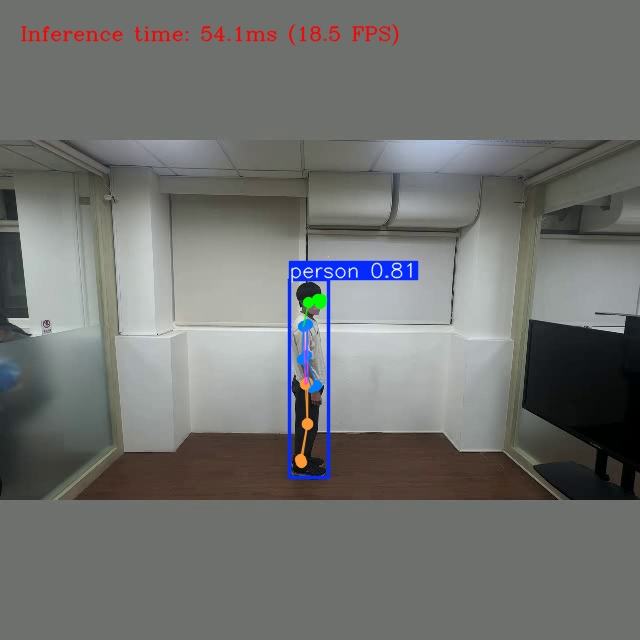

Source ended


In [16]:
run_keypoint_detection(
    source="data/formmed.mp4",
    flip=False,
    use_popup=False,
    model=quantized_pose_model, # pose_ov_model, quantized_pose_model
    device=device.value,
)

In [114]:
run_inference_to_json(
    source="data/padded_1.mp4",
    target_fps=10,
    output_dir="results",
    model=quantized_pose_model
)

ÂΩ±Áâá FPS = 25.00
Â∞áÊØè 2 ÂπÄÂÅö‰∏ÄÊ¨°Êé®Ë´ñ‰ª•ÈÅîÊàê 10 FPS

0: 640x640 2 persons, 105.8ms
Speed: 4.0ms preprocess, 105.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
[Êé®Ë´ñÊôÇÈñì: 116.2ms (8.6 FPS)]

0: 640x640 2 persons, 83.3ms
Speed: 2.9ms preprocess, 83.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
[Êé®Ë´ñÊôÇÈñì: 104.5ms (9.6 FPS)]

0: 640x640 2 persons, 82.9ms
Speed: 2.3ms preprocess, 82.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
[Êé®Ë´ñÊôÇÈñì: 100.3ms (10.0 FPS)]

0: 640x640 2 persons, 91.4ms
Speed: 2.9ms preprocess, 91.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
[Êé®Ë´ñÊôÇÈñì: 100.8ms (9.9 FPS)]

0: 640x640 2 persons, 91.3ms
Speed: 1.9ms preprocess, 91.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
[Êé®Ë´ñÊôÇÈñì: 100.5ms (9.9 FPS)]

0: 640x640 2 persons, 85.1ms
Speed: 2.0ms preprocess, 85.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
[Ê

In [107]:
process_video_with_yolo_and_fps_control("data/formmed.mp4", target_fps=10,show=True)


üéûÔ∏è ÂéüÂßã FPS: 59.94 ‚Üí ÁõÆÊ®ô FPS: 10ÔºåÊØè 6 ÂπÄÂèñ 1 ÂπÄ

0: 640x640 1 person, 249.5ms
Speed: 27.8ms preprocess, 249.5ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)
[Frame 0] Processing FPS: 11.79

0: 640x640 1 person, 1 tv, 98.2ms
Speed: 1.6ms preprocess, 98.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
[Frame 6] Processing FPS: 1.95

0: 640x640 1 person, 1 tv, 93.0ms
Speed: 3.0ms preprocess, 93.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
[Frame 12] Processing FPS: 8.12

0: 640x640 1 person, 1 tv, 101.2ms
Speed: 1.6ms preprocess, 101.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[Frame 18] Processing FPS: 8.92

0: 640x640 1 person, 1 tv, 85.0ms
Speed: 1.6ms preprocess, 85.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
[Frame 24] Processing FPS: 8.55

0: 640x640 1 person, 1 tv, 83.3ms
Speed: 1.8ms preprocess, 83.3ms inference, 2.3ms postprocess per image at shape (

In [82]:
process_video_to_json(
    video_path="data/formmed.mp4",
    output_dir="target_results",
    target_fps=10,
    model_path="yolov8n.pt",
    confidence_threshold=0.3
)


üéûÔ∏è ÂéüÂßã FPS: 59.94 ‚Üí ÁõÆÊ®ô FPS: 10ÔºåÊØè 6 ÂπÄÂèñ 1 ÂπÄ

0: 640x640 1 person, 87.9ms
Speed: 3.1ms preprocess, 87.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
[Frame 0] Detected 1 objects | FPS: 5.85

0: 640x640 1 person, 1 tv, 83.0ms
Speed: 2.4ms preprocess, 83.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
[Frame 6] Detected 2 objects | FPS: 10.03

0: 640x640 1 person, 1 tv, 71.4ms
Speed: 1.7ms preprocess, 71.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
[Frame 12] Detected 2 objects | FPS: 11.91

0: 640x640 1 person, 1 tv, 75.0ms
Speed: 2.2ms preprocess, 75.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
[Frame 18] Detected 2 objects | FPS: 11.34

0: 640x640 1 person, 1 tv, 65.1ms
Speed: 1.6ms preprocess, 65.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
[Frame 24] Detected 2 objects | FPS: 13.13

0: 640x640 1 person, 1 tv, 77.9ms
Speed: 2.2ms preprocess, 77.9ms i